# Homework 1. Exploratory Data Analysis



## Introduction

In this homework we ask you three questions that we expect you to answer using data. For each question we ask you to complete a series of tasks that should help guide you through the data analysis. Complete these tasks and then write a short (100 words or less) answer to the question.

**Note**: We will briefly discuss this homework assignment on Thursday in class.

#### Data
For this assignment we will use two databases: 

1. The [Sean Lahman's Baseball Database](http://seanlahman.com/baseball-archive/statistics) which contains the "complete batting and pitching statistics from 1871 to 2013, plus fielding statistics, standings, team stats, managerial records, post-season data, and more. 

2. [Gapminder](http://www.gapminder.org) is a great resource that contains over [500 data sets](http://www.gapminder.org/data/) related to world indicators such as income, GDP and life expectancy. 


#### Purpose

In this assignment, you will learn how to: 

a. Load in CSV files from the web. 

b. Create functions in python. 

C. Create plots and summary statistics for exploratory data analysis such as histograms, boxplots and scatter plots. 


#### Useful libraries for this assignment 

* [numpy](http://docs.scipy.org/doc/numpy-dev/user/index.html), for arrays
* [pandas](http://pandas.pydata.org/), for data frames
* [matplotlib](http://matplotlib.org/), for plotting

---

In [19]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Problem 1

In Lecture 1, we showed a plot that provided evidence that the 2002 and 2003 Oakland A's, a team that used data science, had a competitive advantage. Since, others teams have started using data science as well. Use exploratory data analysis to determine if the competitive advantage has since disappeared. 

In [20]:
#your code here
import pandas as pd
df1=pd.read_csv('./lahman-csv_2014-02-14/Salaries.csv')
print(df1.head())
df2=pd.read_csv('./lahman-csv_2014-02-14/Teams.csv')
print( df2.head())

   yearID teamID lgID   playerID   salary
0    1985    BAL   AL  murraed02  1472819
1    1985    BAL   AL   lynnfr01  1090000
2    1985    BAL   AL  ripkeca01   800000
3    1985    BAL   AL   lacyle01   725000
4    1985    BAL   AL  flanami01   641667
   yearID lgID teamID franchID divID  Rank   G  Ghome   W   L     ...       \
0    1871  NaN    PH1      PNA   NaN     1  28    NaN  21   7     ...        
1    1871  NaN    CH1      CNA   NaN     2  28    NaN  19   9     ...        
2    1871  NaN    BS1      BNA   NaN     3  31    NaN  20  10     ...        
3    1871  NaN    WS3      OLY   NaN     4  32    NaN  15  15     ...        
4    1871  NaN    NY2      NNA   NaN     5  33    NaN  16  17     ...        

   DP    FP                     name                      park  attendance  \
0 NaN  0.84   Philadelphia Athletics  Jefferson Street Grounds         NaN   
1 NaN  0.82  Chicago White Stockings   Union Base-Ball Grounds         NaN   
2 NaN  0.83     Boston Red Stockings       So

In [21]:
#### Problem 1(a) 
Load in [these CSV files](http://seanlahman.com/files/database/lahman-csv_2014-02-14.zip) from the [Sean Lahman's Baseball Database](http://seanlahman.com/baseball-archive/statistics). For this assignment, we will use the 'Salaries.csv' and 'Teams.csv' tables. Read these tables into a pandas `DataFrame` and show the head of each table. 

**Hint** Use the [requests](http://docs.python-requests.org/en/latest/), [StringIO](http://docs.python.org/2/library/stringio.html) and [zipfile](https://docs.python.org/2/library/zipfile.html) modules to get from the web.  

SyntaxError: invalid syntax (<ipython-input-21-5206bb4f2a54>, line 2)

In [ ]:
#### Problem 1(b)

Summarize the Salaries DataFrame to show the total salaries for each team for each year. Show the head of the new summarized DataFrame. 

In [6]:
#your code here
data1=df1.groupby(['yearID','teamID'],as_index=False).agg({"salary":"sum"})
print(data1.head())


   yearID teamID    salary
0    1985    ATL  14807000
1    1985    BAL  11560712
2    1985    BOS  10897560
3    1985    CAL  14427894
4    1985    CHA   9846178


#### Problem 1(c)

Merge the new summarized Salaries DataFrame and Teams DataFrame together to create a new DataFrame
showing wins and total salaries for each team for each year year. Show the head of the new merged DataFrame.

**Hint**: Merge the DataFrames using `teamID` and `yearID`.

In [7]:
#your code here
data2=pd.merge(data1,df2[['teamID','yearID','W']],on=['teamID','yearID'])
print(data2.head())

   yearID teamID    salary   W
0    1985    ATL  14807000  66
1    1985    BAL  11560712  83
2    1985    BOS  10897560  81
3    1985    CAL  14427894  90
4    1985    CHA   9846178  85


#### Problem 1(d)

How would you graphically display the relationship between total wins and total salaries for a given year? What kind of plot would be best? Choose a plot to show this relationship and specifically annotate the Oakland baseball team on the on the plot. Show this plot across multiple years. In which years can you detect a competitive advantage from the Oakland baseball team of using data science? When did this end? 

**Hints**: Use a `for` loop to consider multiple years. Use the `teamID` (three letter representation of the team name) to save space on the plot.  

[ 9058606  9779421 11680839  9690000 15613070 19887501 36999167 41035000
 37812333 34172500 37739225 21243000 24018500 21303000 24431833 31971333
 33810750 40004167 50260834 59425667 55425762 62243079 79366940 47967126
 61910000 55254900 66536500 55372500 60132500]
[ 77  76  81 104  99 103  84  96  68  51  67  78  65  74  87  91 102 103
  96  91  88  93  76  75  75  81  74  94  96]


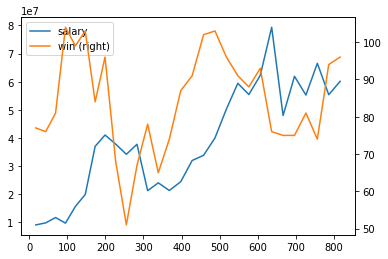

In [9]:
#your code here
data3=data2[data2['teamID']=='OAK']
print( data3['salary'].values)
print( data3['W'].values)
data3.salary.plot(label="salary", legend=True)
data3.W.plot(secondary_y=True, label="win", legend=True)


#### Problem 1(e):

**For AC209 Students**: Fit a linear regression to the data from each year and obtain the residuals. Plot the residuals against time to detect patterns that support your answer in 1(d). 

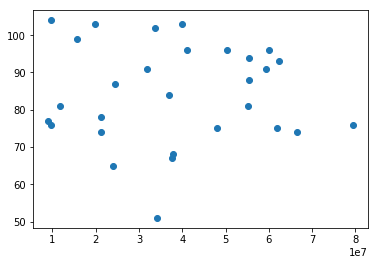

In [10]:
#your code here
data3=data2[data2['teamID']=='OAK']
plt.scatter(data3['salary'].values,data3['W'].values)
plt.show()



## Discussion for Problem 1

*Write a brief discussion of your conclusions to the questions and tasks above in 100 words or less.*

---


## Problem 2

Several media reports have demonstrated the income inequality has increased in the US during this last decade. Here we will look at global data. Use exploratory data analysis to determine if the gap between Africa/Latin America/Asia and Europe/NorthAmerica has increased, decreased or stayed the same during the last two decades. 

#### Problem 2(a)

Using the list of countries by continent from [World Atlas](http://www.worldatlas.com/cntycont.htm) data, load in the `countries.csv` file into a pandas DataFrame and name this data set as `countries`.  This data set can be found on Github in the 2014_data repository [here](https://github.com/cs109/2014_data/blob/master/countries.csv). 

In [11]:
#your code here
countries=pd.read_csv('F:/Downloads/Compressed/2014_data/countries.csv')
print (countries.head())

    Country  Region
0   Algeria  AFRICA
1    Angola  AFRICA
2     Benin  AFRICA
3  Botswana  AFRICA
4   Burkina  AFRICA


Using the [data available on Gapminder](http://www.gapminder.org/data/), load in the [Income per person (GDP/capita, PPP$ inflation-adjusted)](https://spreadsheets.google.com/pub?key=phAwcNAVuyj1jiMAkmq1iMg&gid=0) as a pandas DataFrame and name this data set as `income`.

**Hint**: Consider using the pandas function `pandas.read_excel()` to read in the .xlsx file directly.

In [12]:
#your code here
income=pd.read_excel('F:/Downloads/Compressed/2014_data/indicator gapminder gdp_per_capita_ppp.xlsx').dropna()
print(income.head())

  GDP per capita    1800    1801    1802    1803    1804    1805    1806  \
1    Afghanistan   603.0   603.0   603.0   603.0   603.0   603.0   603.0   
3        Albania   667.0   667.0   668.0   668.0   668.0   668.0   668.0   
4        Algeria   716.0   716.0   717.0   718.0   719.0   720.0   721.0   
6        Andorra  1197.0  1199.0  1201.0  1204.0  1206.0  1208.0  1210.0   
7         Angola   618.0   620.0   623.0   626.0   628.0   631.0   634.0   

     1807    1808   ...        2006     2007     2008     2009     2010  \
1   603.0   603.0   ...      1173.0   1298.0   1311.0   1548.0   1637.0   
3   668.0   668.0   ...      7476.0   7977.0   8644.0   8994.0   9374.0   
4   722.0   723.0   ...     12088.0  12289.0  12314.0  12285.0  12494.0   
6  1212.0  1215.0   ...     42738.0  43442.0  41426.0  41735.0  38982.0   
7   637.0   640.0   ...      5445.0   6453.0   7103.0   7039.0   7047.0   

      2011     2012     2013     2014     2015  
1   1695.0   1893.0   1884.0   1877.0   192

Transform the data set to have years as the rows and countries as the columns. Show the head of this data set when it is loaded. 

In [13]:
#your code here
income1=income.set_index('GDP per capita').T
print(income1.head())

GDP per capita  Afghanistan  Albania  Algeria  Andorra  Angola  \
1800                  603.0    667.0    716.0   1197.0   618.0   
1801                  603.0    667.0    716.0   1199.0   620.0   
1802                  603.0    668.0    717.0   1201.0   623.0   
1803                  603.0    668.0    718.0   1204.0   626.0   
1804                  603.0    668.0    719.0   1206.0   628.0   

GDP per capita  Antigua and Barbuda  Argentina  Armenia  Aruba  Australia  \
1800                          757.0     1507.0    514.0  833.0      815.0   
1801                          757.0     1508.0    514.0  833.0      816.0   
1802                          757.0     1508.0    514.0  833.0      818.0   
1803                          757.0     1508.0    514.0  833.0      820.0   
1804                          757.0     1508.0    514.0  833.0      822.0   

GDP per capita     ...       Uruguay  Uzbekistan  Vanuatu  Venezuela  \
1800               ...        1758.0       502.0    585.0      682.0

#### Problem 2(b)

Graphically display the distribution of income per person across all countries in the world for any given year (e.g. 2000).  What kind of plot would be best? 

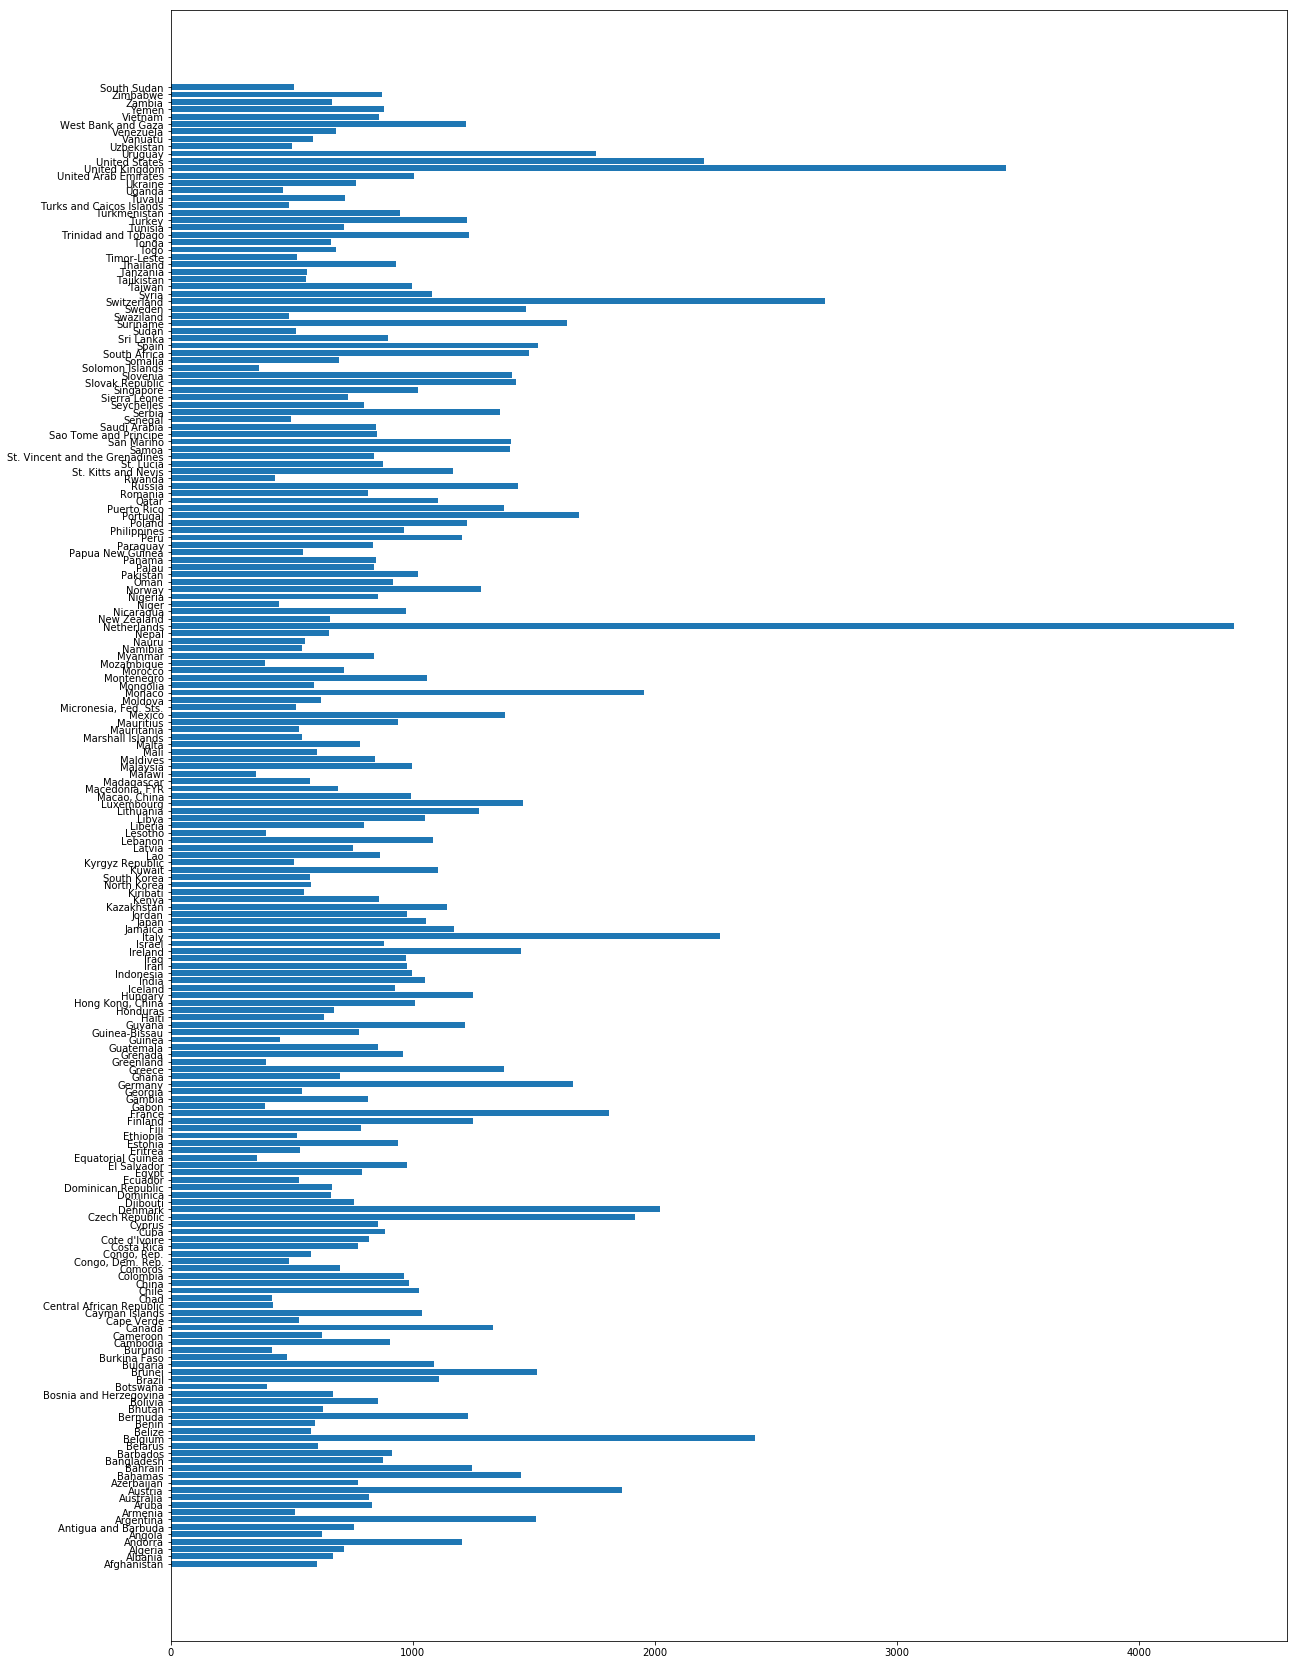

In [14]:
#your code here
def plotByYear(year):
 plt.figure(figsize=(20,30))
 values=income1.iloc[year-1800].tolist()
 columnName=list(income1.head(0))  
 plt.barh(np.array(columnName),np.array(values),align='center')   
 plt.show()   
plotByYear(1802)   

In [21]:
"""
Function
--------
mergeByYear

Return a merged DataFrame containing the income, 
country name and region for a given year. 

Parameters
----------
year : int
    The year of interest

Returns
-------
a DataFrame
   A pandas DataFrame with three columns titled 
   'Country', 'Region', and 'Income'. 

Example
-------
>>> mergeByYear(2010)
"""
#your code here
def mergeByYear(year):
    result=pd.merge(income[['GDP per capita',year]].dropna(),countries,left_on='GDP per capita',right_on='Country',how='inner')
    result.columns=result.columns.astype(str).str.replace(str(year),'Income')
    return result[['GDP per capita','Region','Income']].sort_values('Region')
mergeByYear(2000)    
   
    

,GDP per capita,Region,Income
86,Lesotho,AFRICA,1629.0
98,Mauritania,AFRICA,2738.0
95,Mali,AFRICA,1269.0
92,Malawi,AFRICA,632.0
91,Madagascar,AFRICA,1446.0
88,Libya,AFRICA,22682.0
87,Liberia,AFRICA,473.0
172,Zimbabwe,AFRICA,2521.0
99,Mauritius,AFRICA,11349.0
81,Kenya,AFRICA,2143.0


#### Problem 2(d) 

Use exploratory data analysis tools such as histograms and boxplots to explore the distribution of the income per person by region data set from 2(c) for a given year. Describe how these change through the recent years?

**Hint**: Use a `for` loop to consider multiple years.  

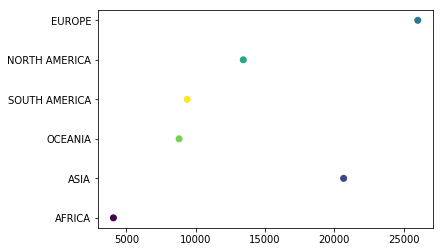

[1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014]


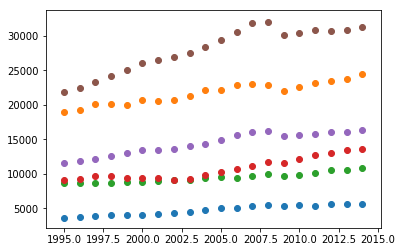

In [42]:
#your code here
def changeRegionToColor(Region):
    switcher ={
        'AFRICA':0,
        'ASIA':2,
        'EUROPE':4,
        'NORTH AMERICA':6,
        'OCEANIA':8,
        'SOUTH AMERICA':10,
    }
    return switcher.get(Region,5) 
IncomeIn2000=mergeByYear(2000)
# plt.figure(figsize=(20,30))
Regions=['AFRICA','ASIA','OCEANIA','SOUTH AMERICA','NORTH AMERICA','EUROPE']
colors =[]
incomesByRegion=[]
for region in  Regions:
        incomes=IncomeIn2000.loc[IncomeIn2000['Region'].isin([region])]
        mean=incomes['Income'].mean()
        incomesByRegion.append(mean)
        colors.append(changeRegionToColor(region))
plt.scatter(incomesByRegion,Regions,c=colors)
plt.show()
a=np.empty(20); 
years=[i for i in range(1995,2015)]
for region in Regions:
    incomesByRegion=[]
    for i in range(1995,2015):
        IncomeInYear=mergeByYear(i)
        incomes=IncomeInYear.loc[IncomeInYear['Region'].isin([region])]
        mean=incomes['Income'].mean()
        incomesByRegion.append(mean)
    plt.scatter(years,incomesByRegion,label=str(region),c=a.fill(changeRegionToColor(region)))    
plt.show()

## Discussion for Problem 2

*Write a brief discussion of your conclusions to the questions and tasks above in 100 words or less.*

---


## Problem 3

In general, if group A has larger values than group B on average, does this mean the largest values are from group A? Discuss after completing each of the problems below. 

#### Problem 3(a)

Assume you have two list of numbers, X and Y, with distribution approximately normal. X and Y have standard deviation equal to 1, but the average of X is different from the average of Y.  If the difference in the average of X and the average of Y is larger than 0, how does the proportion of X > a compare to the proportion of Y > a? 

Write a function that analytically calculates the ratio of these two proportions: Pr(X > a)/Pr(Y > a) as function of the difference in the average of X and the average of Y. 

**Hint**: Use the `scipy.stats` module for useful functions related to a normal random variable such as the probability density function, cumulative distribution function and survival function. 

**Update**: Assume Y is normally distributed with mean equal to 0. 

Show the curve for different values of a (a = 2,3,4 and 5).

In [25]:
"""
Function
--------
ratioNormals

Return ratio of these two proportions: 
    Pr(X > a)/Pr(Y > a) as function of 
    the difference in the average of X 
    and the average of Y. 

Parameters
----------
diff : difference in the average of X 
    and the average of Y. 
a : cutoff value

Returns
-------
Returns ratio of these two proportions: 
    Pr(X > a)/Pr(Y > a)
    
Example
-------
>>> ratioNormals(diff = 1, a = 2)
"""
#your code here
import statistics as sta
from scipy.stats import norm 
def ratioNormals(diff,a):
    x = norm.rvs(size=1000)
    y = norm.rvs(loc=diff,size=1000)
    x=list(x>a).count(True)
    y=list(y>a).count(True)
    return x/y
ratioNormals(1,2)

0.13194444444444445

#### Problem 3(b)

Now consider the distribution of income per person from two regions: Asia and South America. Estimate the average income per person across the countries in those two regions. Which region has the larger average of income per person across the countries in that region? 

**Update**: Use the year 2012. 

In [26]:
#your code here
p3=mergeByYear(2012)
p3=p3.loc[p3['Region'].isin(['ASIA','SOUTH AMERICA'])]
mean=np.mean(p3['Income'])
p3=p3.sort_values(by=['Income'],ascending=False)
print(p3.iloc[1]['Region'])

ASIA


#### Problem 3(c) 

Calculate the proportion of countries with income per person that is greater than 10,000 dollars. Which region has a larger proportion of countries with income per person greater than 10,000 dollars? If the answer here is different from the answer in 3(b), explain why in light of your answer to 3(a).

**Update**: Use the year 2012. 

In [27]:
#your code hersdase
p3c=mergeByYear(2012)

regions=['ASIA','SOUTH AMERICA' ]
propor=[]
for region in regions:
    localincome=p3c.loc[p3c['Region'].isin([region])]
    pro=list(localincome['Income']>10000).count(True)/localincome['Region'].count()
    propor.append(pro) 
# regions=np.append(regions,'WORLD')
# wpropor=list(p3c['Income']>10000).count(True)/p3c['Region'].count()
# propor.append(wpropor)
result=pd.DataFrame({'Region':regions,'Proportion':propor}).sort_values(by='Proportion',ascending=False)
# pro=result.loc[6]['Proportion']
# result1=result[result['Proportion']>=pro]
print(result.iloc[0]['Region'])


SOUTH AMERICA


#### Problem 3(d)

**For AC209 Students**: Re-run this analysis in Problem 3 but compute the average income per person for each region, instead of the average of the reported incomes per person across countries in the region. Why are these two different? Hint: use this [data set](https://spreadsheets.google.com/pub?key=phAwcNAVuyj0XOoBL_n5tAQ&gid=0). 

In [28]:
#your code here
p3c=mergeByYear(2012)
regions=['ASIA','SOUTH AMERICA' ]
propor=[]
for region in regions:
    localincome=p3c.loc[p3c['Region'].isin([region])]
    mean=localincome['Income'].mean()
    pro=list(localincome['Income']>mean).count(True)/localincome['Region'].count()
    propor.append(pro) 
result=pd.DataFrame({'Region':regions,'Proportion':propor}).sort_values(by='Proportion',ascending=False)
print(result.iloc[0]['Region'])

SOUTH AMERICA


## Discussion for Problem 3

*Write a brief discussion of your conclusions to the questions and tasks above in 100 words or less.*

--- 
if group A has larger values than group B on average, it's not mean that the largest values are from group A
